# **Project 40: Traffic Sign Classifier**

***os*** : *Provides a way of using operating system-dependent functionality like file manipulation and environment management.*

***warnings*** : *Allows control over warning messages, enabling filtering, ignoring, or displaying them during code execution.*

***matplotlib.pyplot*** : *A plotting library for creating static, interactive, and animated visualizations in Python.*

***seaborn*** : *A statistical data visualization library built on top of Matplotlib, offering more attractive and informative graphics.*

***pandas*** : *A data manipulation and analysis library that provides data structures like DataFrames for handling labeled and relational data.*

**Importing these libraries for Preprocessing Images and Image Analysis.**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**The code you provided mounts your Google Drive to the /content/drive directory in Google Colab.**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Installs the unrar package for extracting RAR files in Python.**

In [ ]:
!pip install unrar

**Extracts the contents of the specified RAR file located at the given path using the unrar command.**

In [ ]:
!unrar x "/content/drive/MyDrive/Traffic Sign Classifier Dataset.rar"

**Suppresses all warnings in Python by setting the warning filter to "ignore".**

In [5]:
warnings.simplefilter("ignore")

**Imports and Setup: Imports necessary libraries and sets up a figure with a size of 12x12 inches.**

**Image Display: Loops through a range to display 16 images in a 4x4 grid, randomly selecting images from the specified directory.**

**Labels and Layout: Adjusts layout for each subplot, sets image dimensions as labels, and uses plt.tight_layout() to optimize spacing.**

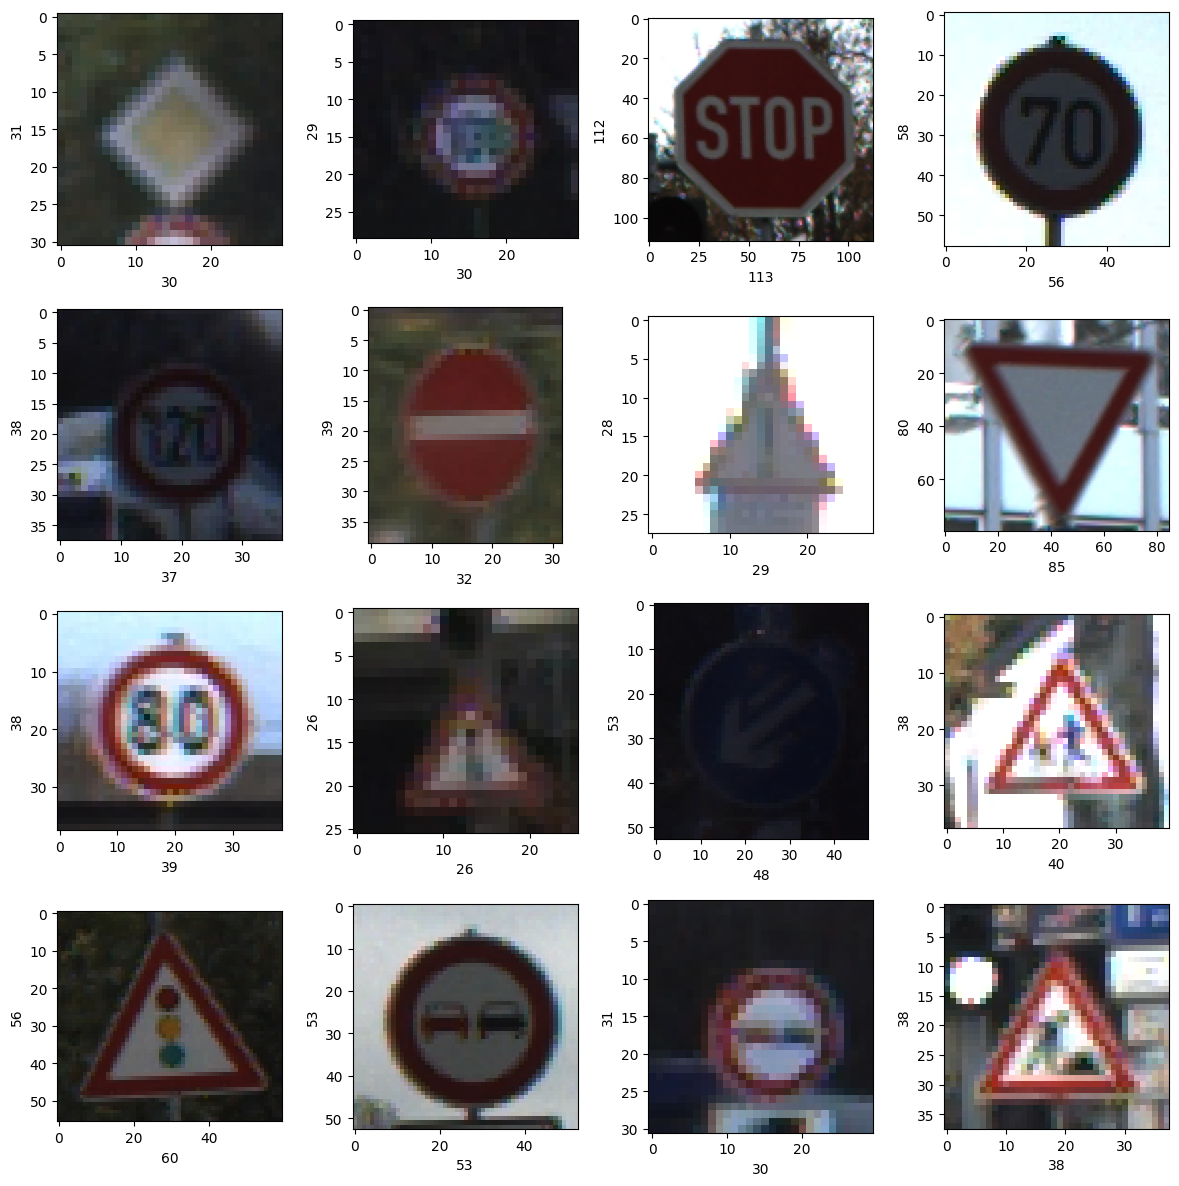

In [7]:
import random
from matplotlib.image import imread

plt.figure(figsize = (12,12))
path = "/content/Traffic Sign Classifier Dataset/Test"
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(path + "/" + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

**Initialize Lists: Creates empty lists dim1 and dim2 to store image dimensions.**

**Iterate Over Labels: Loops through 43 categories, constructing paths for each category's training images and listing the files.**

**Append Dimensions: Reads each image, appends its height to dim1, and its width to dim2.**

In [8]:
dim1 = []
dim2 = []

for i in range(0, 43):
    labels = "/content/Traffic Sign Classifier Dataset/Train" + "/{0}".format(i)
    image_path = os.listdir(labels)

    for x in image_path:
        img = imread(labels + "/" + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

**Import NumPy: Imports the numpy library for numerical operations.**

**Calculate Means: Uses np.mean() to compute the average values of dim1 (heights) and dim2 (widths).**

**Print Results: Displays the mean height and width of the images.**

In [9]:
import numpy as np
print("Dimension 1 Mean : ", np.mean(dim1), "Dimension 2 Mean : ", np.mean(dim2))

Dimension 1 Mean :  50.328929582493814 Dimension 2 Mean :  50.83587951745773


**Initialize Lists: Creates empty lists images and label_id to store resized images and their corresponding labels.**

**Load and Resize Images: Loops through 43 categories, loads each image, resizes it to 50x50 pixels using the PIL library, and converts it to a NumPy array.**

**Store Data: Appends the resized image to images and the corresponding label index i to label_id.**

In [10]:
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = "/content/Traffic Sign Classifier Dataset/Train" + "/{0}".format(i)
    image_path = os.listdir(labels)

    for x in image_path:
        img = Image.open(labels + "/" + x)
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

**Convert List to Array: Converts the list of images into a NumPy array.**

**Normalize Pixel Values: Scales the pixel values of the images to the range [0, 1] by dividing by 255.**

In [11]:
images = np.array(images)

images = images/255

**Convert List to Array: Converts the list of labels (label_id) into a NumPy array.**

**Check Shape: Displays the shape of the label_id array, which indicates the total number of labels and their dimensions.**

In [13]:
label_id = np.array(label_id)
label_id.shape

(39209,)

**The images.shape will provide the dimensions of the images NumPy array, showing the number of images and the dimensions of each image.**

In [14]:
images.shape

(39209, 50, 50, 3)

**Create DataFrame: Converts the label_id array into a Pandas DataFrame.**

**Count Labels: Uses value_counts() to count the occurrences of each label in the DataFrame.**

**Display Counts: Shows the most common labels and their counts with head(), providing a summary of label distribution.**

In [15]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


**Import Function: Imports the train_test_split function from sklearn.model_selection.**

**Split Data: Splits the images and label_id arrays into training and validation sets, with 80% of the data used for training (X_train, y_train) and 20% for validation (X_val, y_val).**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, label_id, train_size = 0.80)

**Import Function: Imports the to_categorical function from tensorflow.keras.utils.**

**One-Hot Encoding: Converts the y_train and y_val label arrays into one-hot encoded format, making them suitable for classification tasks in neural networks.**

In [17]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

**Import Sequential Model: Imports the Sequential model from tensorflow.keras.models to build a linear stack of layers.**

**Import Layers: Imports essential layers for a Convolutional Neural Network (CNN):**

- **Conv2D: 2D convolutional layer for feature extraction.**
- **Dense: Fully connected layer for classification.**
- **Dropout: Regularization layer to prevent overfitting.**
- **MaxPool2D: Max pooling layer for downsampling.**
- **Flatten: Flatten layer to convert 2D feature maps to 1D.**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten

**Initialize Model: Creates an instance of the Sequential class, initializing an empty neural network model that will be built layer by layer.**

In [19]:
model = Sequential()

**Add Convolutional Layers:**

- **First Layer: 2D convolution with 64 filters, a 3x3 kernel, ReLU activation, and 'same' padding. Follows with a max pooling layer (2x2) and dropout (0.5) for regularization.**
- **Second Layer: Another 2D convolution with 64 filters, a 3x3 kernel, and ReLU activation. Followed by max pooling (2x2) and dropout (0.5).**

**Flatten and Dense Layers:**

- **Flatten: Converts the 2D feature maps into a 1D vector.**
- **Dense Layers: Fully connected layer with 128 units and ReLU activation, followed by dropout (0.5) and another dense layer with 43 units and softmax activation for classification.**

In [20]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = X_train.shape[1:], activation = "relu", padding = "same"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(43, activation = "softmax"))

**Compile Model: Configures the model for training with the following settings:**

- **Loss Function: 'sparse_categorical_crossentropy', suitable for multi-class classification with integer labels.**
- **Optimizer: "adam", an adaptive learning rate optimization algorithm.**
- **Metrics: "accuracy", to track the accuracy of the model during training and evaluation.**

**Display Summary: Prints a summary of the model architecture, including the number of parameters and the shape of each layer.**

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

**This code snippet trains the model with the following settings:**

**Training Data: Uses X_train and y_train for training, and X_val and y_val for validation.**

**Training Parameters:**

- **Epochs: 10 epochs, specifying the number of times the entire dataset will pass through the model.**
- **Batch Size: 128, the number of samples processed before updating the model.**

- **Verbose: 2, provides detailed output about the training process.**

In [23]:
model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 257s - 1s/step - accuracy: 0.5969 - loss: 1.2878 - val_accuracy: 0.8623 - val_loss: 0.6068
Epoch 2/10
246/246 - 262s - 1s/step - accuracy: 0.7404 - loss: 0.8062 - val_accuracy: 0.9360 - val_loss: 0.3426
Epoch 3/10
246/246 - 312s - 1s/step - accuracy: 0.8044 - loss: 0.6020 - val_accuracy: 0.9616 - val_loss: 0.1953
Epoch 4/10
246/246 - 259s - 1s/step - accuracy: 0.8414 - loss: 0.4892 - val_accuracy: 0.9640 - val_loss: 0.1562
Epoch 5/10
246/246 - 262s - 1s/step - accuracy: 0.8675 - loss: 0.4118 - val_accuracy: 0.9774 - val_loss: 0.1134
Epoch 6/10
246/246 - 259s - 1s/step - accuracy: 0.8817 - loss: 0.3688 - val_accuracy: 0.9824 - val_loss: 0.0980
Epoch 7/10
246/246 - 264s - 1s/step - accuracy: 0.8950 - loss: 0.3240 - val_accuracy: 0.9818 - val_loss: 0.0822
Epoch 8/10
246/246 - 260s - 1s/step - accuracy: 0.9045 - loss: 0.2965 - val_accuracy: 0.9850 - val_loss: 0.0735
Epoch 9/10
246/246 - 249s - 1s/step - accuracy: 0.9123 - loss: 0.2670 - val_accuracy: 0.9888 - val_loss:

**Create DataFrame: Converts the training history (model.history.history) into a Pandas DataFrame.**

**Plot Accuracy: Plots the training accuracy (accuracy) and validation accuracy (val_accuracy) over epochs.**

**Plot Loss: Plots the training loss (loss) and validation loss (val_loss) over epochs.**

<Axes: >

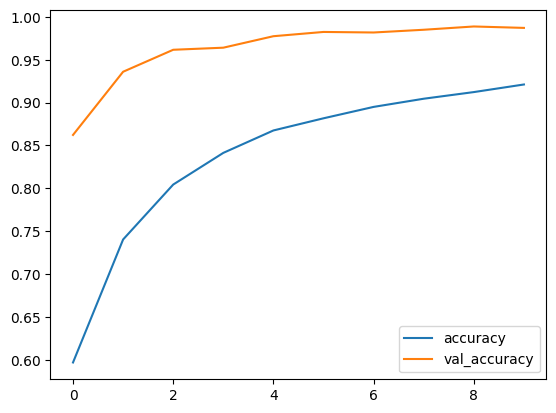

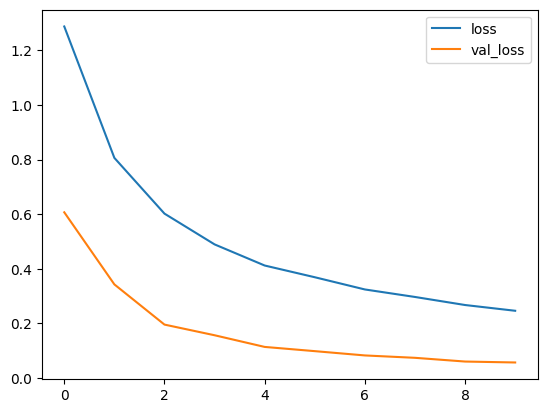

In [25]:
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy", "val_accuracy"]].plot()
evaluation[["loss", "val_loss"]].plot()

**This code snippet saves the trained model to a file named "Finalized-Model.h5" in HDF5 format. This file contains the model architecture, weights, and training configuration, allowing you to reload the model later for further use or evaluation.**

In [26]:
model.save("Finalized-Model.h5")